- Here I will go into more mathematical detail about elliptic curves. 
- If there is something to compute or show I'll probably use the Sage functionality.

The notes here are based on my reading of Rational Points on Elliptic Curves - Silverman and Tate. Since this is **by no means a replacement** for the book it will only cover the relevant theory for cryptography and intuition behind it.

I'll link resources or videos that I found useful

# 1. Geometry and arithmetic

## 1.1, 1.2 Rational points on curves

- $\frac a b$ = rational number  
- $(x, y)$ = rational point;  
- $ax + by + c = 0$ = rational line where $a, b, c$  are rational  
- $ax^2+bxy+cy^2+dx+ey+f=0$ = rational conic

**Projecting a conic onto a line**

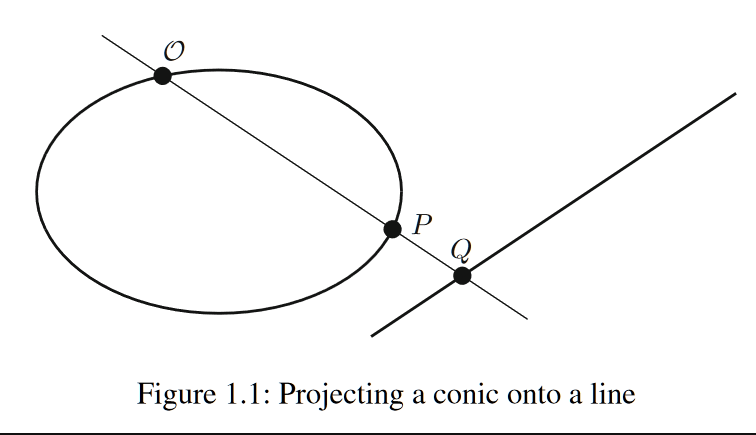

Suppose for now that we know of one rational point $O$ on our rational conic. Then we can get all of the rational points very simply. We just draw some rational line and project the conic onto the line from the point $O$ .
A  line  meets  a  conic  in  two  points,  so  for  every  point $P$ on  the  conic we get a point $Q$ on the line. Conversely, for every point $Q$ on the line, byjoining $Q$ to the point $O$ , we get a point $P$ on the conic.(To project $O$ itself onto the line, we use the tangent line to the conic at $O$) => One-to-One correspondence
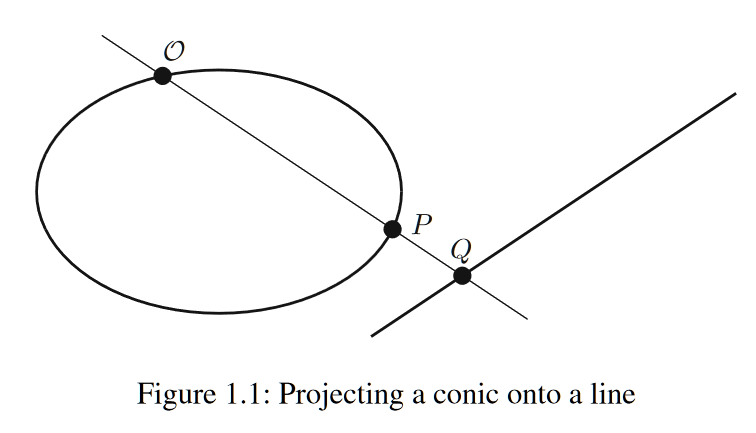

In [58]:
A.<x, y>  = AffineSpace(QQ, 2)
C1 = Curve(y^2 + x^2 - 10)
C2 = Curve(y - x + 10)

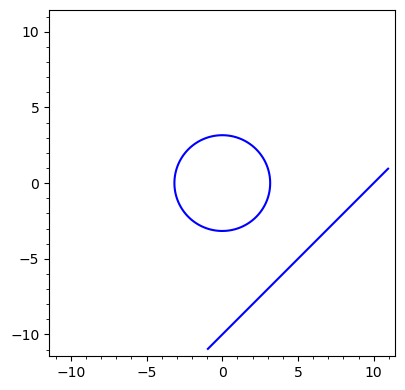

In [59]:
C1.plot() + C2.plot()

Cubic curves: 
$$ax^3+bx^2y+cxy^2+dy^3+ex^2+fxy+gy^2+hx+iy+j=0$$ = General cubic

- We cannot directly use the geometric principle that worked so well for conics because a line generally meets a cubic in three points. And if we haveone rational point, we cannot project the cubic onto a line, because each pointon the line would then correspond to two points on the curve  
**But**
- There is a geometric principle that we can use. If we can find two rational points on the curve, then we can generally find a third one. Namely, draw the line connecting the two points that you know. This will be a rational line,and it meets the cubic in one more point.

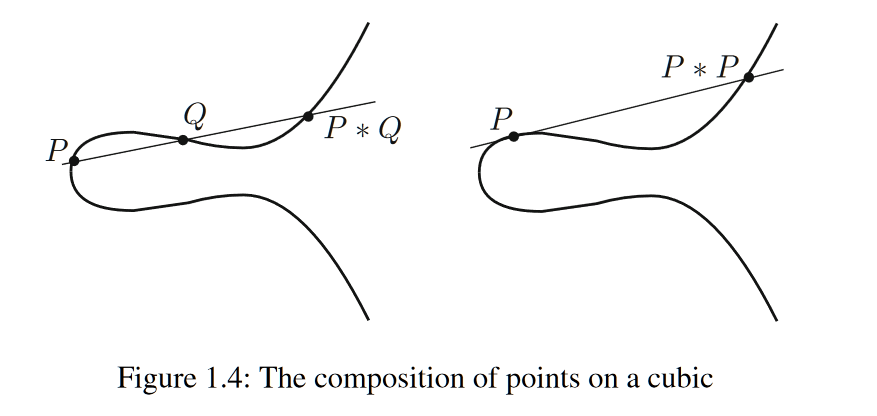

**Mordell's theorem**
- Formulation 1:  If C is a non-singular rational cubic curve, then there is afinite set of rational points such that all other rational points can be obtained by repeatedly drawing lines and taking intersections.
- Formulation 2:  If a non-singular rational plane cubic curve has a rational point, then the group of rational points is finitely generated.

https://en.wikipedia.org/wiki/Mordell%E2%80%93Weil_theorem  
https://en.wikipedia.org/wiki/Faltings%27s_theorem

## 1.3 Weierstrass Normal Form

https://math.stackexchange.com/questions/477834/making-an-elliptic-curve-out-of-a-cubic-polynomial-made-a-cube-or-ax3bx2cx

Every irreductible cubic can be written under the general Weierstrass form (Using some projective geometry tricks):
$$ y^2+a_1xy+a_3y=x^3+a_2x^2+a_4x+a_6$$
$= y^2 + (a_1x + a_3)y = x^3+a_2x^2+a_4x+a_6$
 => taking $y = y - 1/2 (a_1x + a_3) =>$ cubic equation in normal form: $ y^2 = f(x) = x^3 + ax^2 + bx + c$

Taking $a, b, c$ as rational (in particular real) => $f(x)$ has at least one real root => we can factor it as:
$f(x)=(x−α)(x2+βx+γ)$ with $α, β, γ$ real.

[(1.83928675521416, 1), (-0.419643377607081 - 0.606290729207199*I, 1), (-0.419643377607081 + 0.606290729207199*I, 1)]
Elliptic Curve defined by y^2 = x^3 - x^2 - x - 1 over Rational Field


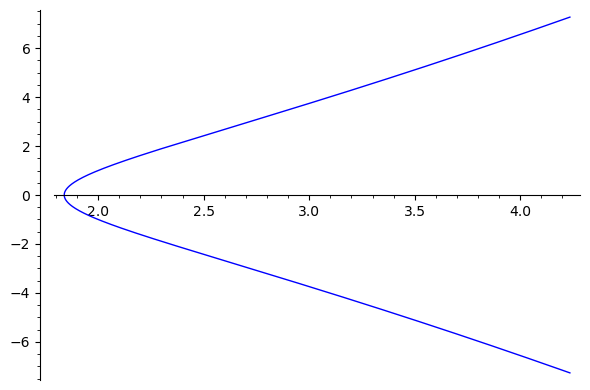

In [37]:
P.<X> = PolynomialRing(CC)
f =  X^3 - X^2 - X - 1
print(f.roots()) # => 1 real root
E = EllipticCurve([0, -1, 0, -1, -1])
print(E)
E.plot()

[(-1.61803398874989, 1), (0.618033988749895, 1), (1.00000000000000, 1)]
Elliptic Curve defined by y^2 = x^3 - 2*x + 1 over Rational Field


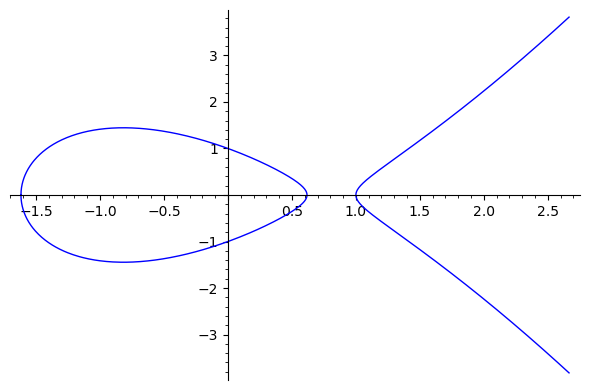

In [39]:
f =  X^3 - 2*X + 1
print(f.roots()) #  3 real roots
E = EllipticCurve([0, 0, 0, -2, 1])
print(E)
E.plot()

### Singular curves

If we write the equation as $F(x, y)=y2−f(x)=0$ and take partial derivatives, $\frac {∂F} {∂x} =−f′(x) \ , \ \frac {∂F} {∂y} =2y$ the curve is non-singular if there is NO point where both derivatives vanish => the point has a well defined tangent line.

If the derivatives **vanish** in $(x_0, y_0) => y_0 = 0 => f(x_0) = y_0^2 = 0$ and $f'(x_0) = 0$ => they have the common (double) root $x_0$ => $(x_0, 0)$ is a **singular point** on the curve

We have 3 pictures for singularity:
1. F has a double root (typical equations)
    - $y^2=x^2(x+1)$
    - $y^2=x^2(x−1)$
2. F has a triple root
    - $y^2=x^3$

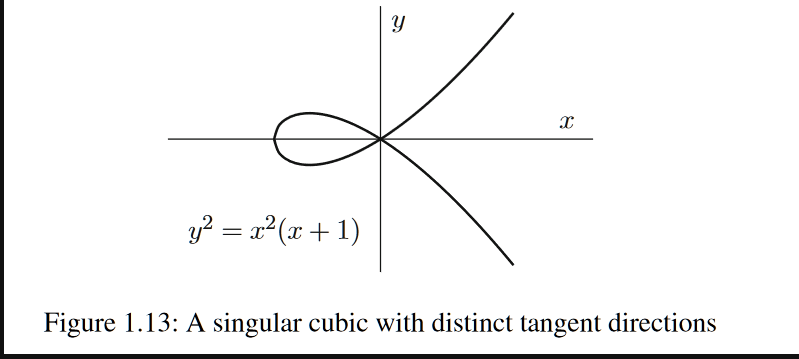
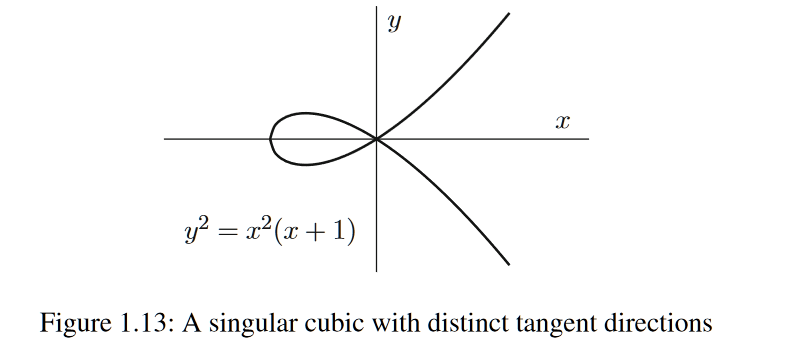

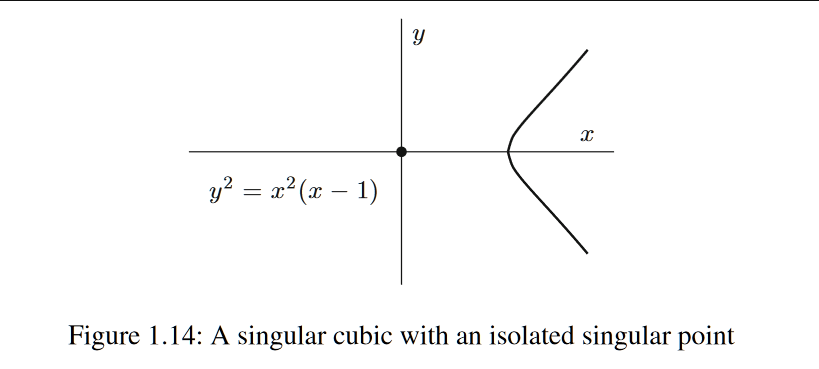
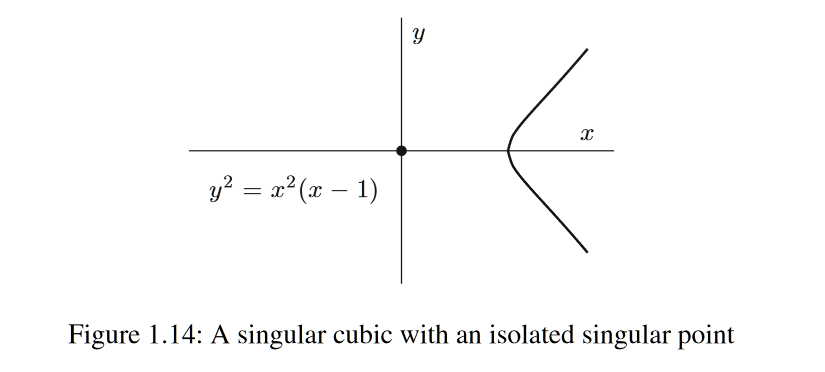

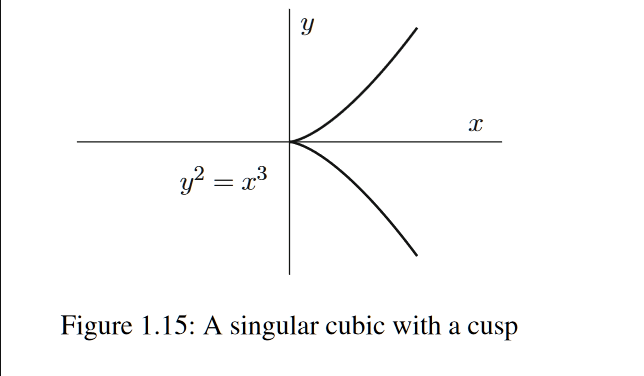
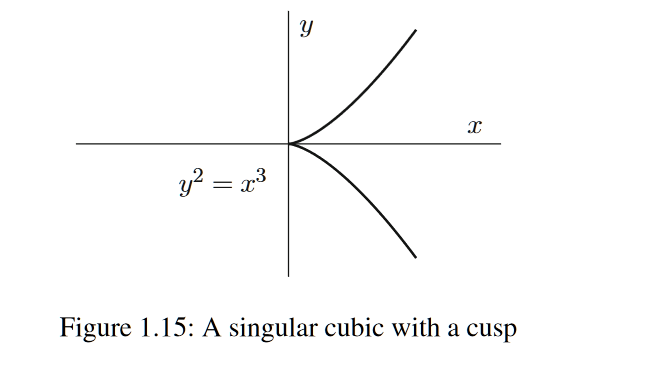

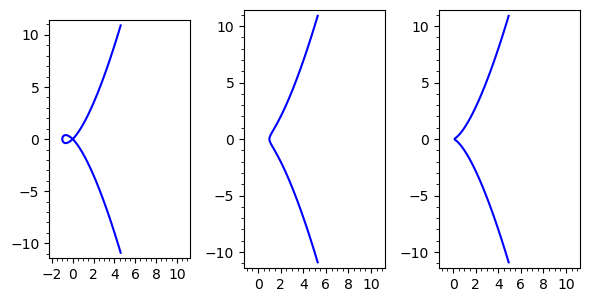

In [64]:
C1 = Curve(y^2 - x^2*(x+1))
C2 = Curve(y^2 - x^2*(x-1))
C3 = Curve(y^2 - x^3)
p1 = C1.plot(); p2 = C2.plot(); p3 = C3.plot(); 
graphics_array((p1, p2, p3))

**Why not use singular curves?**
- Weird behaivour
- For instance, singular cubics are just as easy totreat as conics. If we project from the singular point onto some line, we see that the line going through that singular point meets the cubic twice at the singular  point,  so  it  meets  the  cubic  only  once  more.  The  projection  of  a singular cubic curve onto a line is thus one-to-one. 

Example:  
- $y^2=x^2(x+1)$
- Let $r=y/x  => y = rx => r^2x^2 = x^2(x+1) => r^2=x+1$. So:
    - $x = r^2 - 1$
    - $y = rx = r^3 - r$.
    
So 
- if we take any rational number $r$ and use these equations to define $x$ and $y$,then we obtain a rational point on the cubic 
- if we start with a rational point $(x, y) \neq (0,0)$ on the cubic, we obtain a corresponding rational number $r=x/y$
- These operations are inverses and are defined at all rational points except the singular point $(0,0)$ => we get *all* rational points on the curve

Example:
- $y^2 = x^3$
- Take 
    - $x = t^2$ 
    - $y = t^3$

## 1.4 Group Law formulas

**I assume you went over the two introductory notebooks so this should be easy**

Our equation: $y^2=x^3+ax^2+bx+c$

Homogenous form:
$Y^2Z=X^3+aX^2Z+bXZ^2+cZ^3$

What is the intersection of this cubic with the line at infinity $Z=0$? Substituting $Z=0$ into the equation gives $X^3=0$, which has a triple root $X=0$=> Triple intersection with the line at the **same point** => Our beloved **point at infinity** $\mathcal{O}$ (non-singular)

The point $\mathcal{O}$ is counted as a rational point, and we take it as the **identity element** when we make the set of points into a group

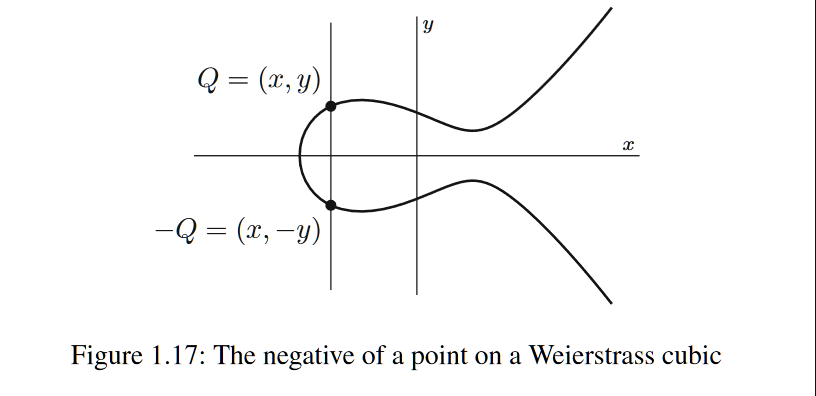
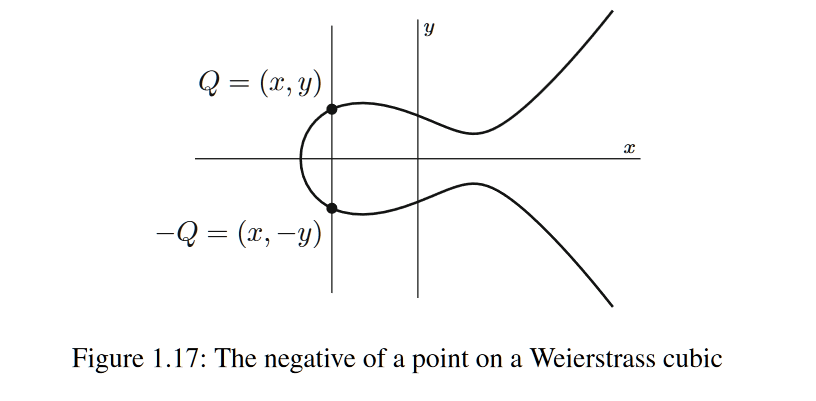

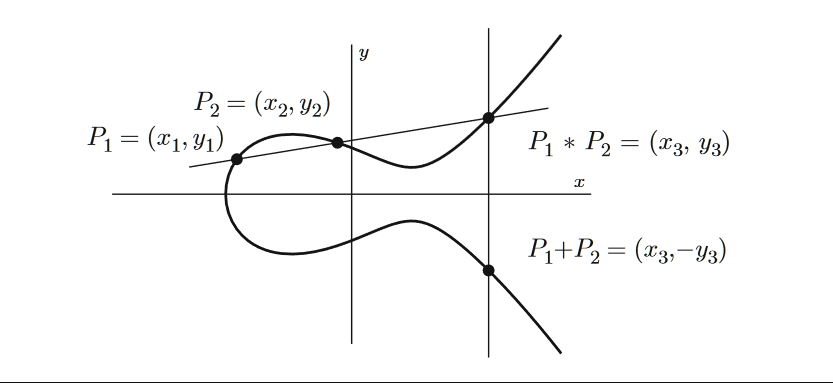
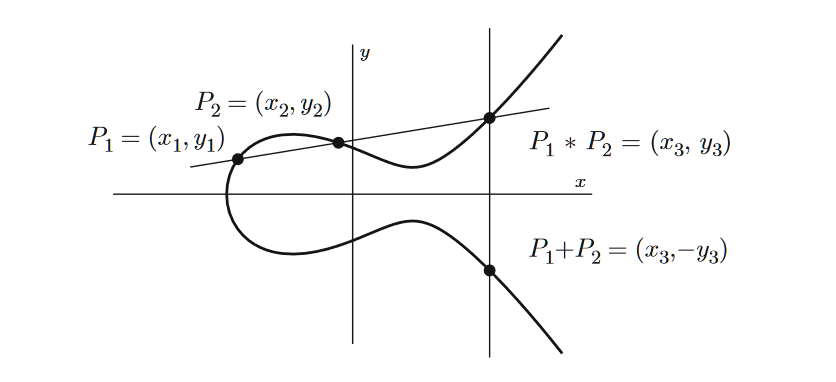

**Point addition**

$P_1=(x_1,y_1), \ P_2=(x_2,y_2), \ P_1∗P_2=(x_3,y_3), \ P_1+P_ 2=(x_3,−y_3)$
- Let's look at the line joining $P_1, P_2$ : $y = \lambda x + \nu$
    - $\lambda = \cfrac {y_2 - y_1} {x_2 - x_1}$
    - $\nu = y_1 - \lambda x_1 = y_2 - \lambda x_2$
- Substitute $y = \lambda x + \nu$ into the equation of the curve
    - $y^2=(λx+ν)^2=x^3+ax^2+bx+c$
    - $0=x^3+(a−λ^2)x^2+(b−2λν)x+(c−ν^2) = (x - x_1)(x-x_2)(x-x_3)$ <= (cubic equation with 3 roots)
- Equating the coefficients and reducing them 
    - $a−λ^2=−x_1−x_2−x_3$
- So:
    - $x_3=λ^2−a−x_1−x_2$
    - $y_3=λx_3+ν$
- Flip $y_3 => P_1 + P_2 = (x_3, -y_3) $

**Point doubling**

- Find the tangent line
    - $\lambda = \cfrac {dy} {dx} \Bigg |_{P_0} = \cfrac {f'(x_0)} {2y_0}$
- Continue the same

**Note**:
- Using just the coordinates: $x$-coordinate of $2(x, y)$= $\cfrac {x^4−2bx^2−8cx+b2−4ac} {4x^3+4ax^2+4bx+4c}$